In [3]:
import os
import json
import numpy as np

import bids
from bids import BIDSLayout
#from bids.analysis import auto_model
#from bids.analysis import Analysis

In [4]:
project_dir = os.path.join('/bgfs/bchandrasekaran/krs228/data/', 'FLT/')
bidsroot = os.path.join(project_dir,'data_bids')
deriv_dir = os.path.join(project_dir, 'derivatives')

In [5]:
bidsroot

'/bgfs/bchandrasekaran/krs228/data/FLT/data_bids'

In [6]:
nilearn_dir = os.path.join(deriv_dir, 'nilearn')
if not os.path.exists(nilearn_dir):
        os.makedirs(nilearn_dir)

In [7]:
task_list = ['tonecat']

### import data with `pybids` and test out capabilities

based on: https://github.com/bids-standard/pybids/blob/master/examples/pybids_tutorial.ipynb

In [8]:
layout = BIDSLayout(bidsroot)

In [9]:
all_files = layout.get()

In [10]:
layout.get(return_type='filename', suffix='bold', task='tonecat',extension='nii.gz')


['/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT01/func/sub-FLT01_task-tonecat_run-02_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT01/func/sub-FLT01_task-tonecat_run-03_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT01/func/sub-FLT01_task-tonecat_run-04_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT01/func/sub-FLT01_task-tonecat_run-05_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT02/func/sub-FLT02_task-tonecat_run-01_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT02/func/sub-FLT02_task-tonecat_run-02_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT02/func/sub-FLT02_task-tonecat_run-03_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT02/func/sub-FLT02_task-tonecat_run-04_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT02/func/sub-FLT02_task-tonecat_run-05_bold.nii.gz',
 '/bgfs/bchandrasek

In [11]:
task_list[0]

'tonecat'

## nilearn modeling: first level

based on: https://nilearn.github.io/auto_examples/04_glm_first_level/plot_bids_features.html#sphx-glr-auto-examples-04-glm-first-level-plot-bids-features-py

In [12]:
from nilearn.glm.first_level import first_level_from_bids
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.reporting import make_glm_report

import nibabel as nib

from nilearn import plotting
import matplotlib.pyplot as plt
from scipy.stats import norm

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [13]:
data_dir = bidsroot
derivatives_folder = os.path.join(deriv_dir, 'fmriprep') # os.path.join(bidsroot, 'derivatives', 'fmriprep')

In [14]:
print(derivatives_folder)

/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep


## First level model

**NOTE**: runs across all participants

In [94]:
space_label = 'T1w' #'MNI152NLin2009cAsym' # 'T1w' 

task_label = 'tonecat'
fwhm_sub = 3.0 # 1.5

print(data_dir, task_label, space_label)
models, models_run_imgs, models_events, models_confounds = \
    first_level_from_bids(data_dir, task_label, space_label=space_label,
                          smoothing_fwhm=fwhm_sub,
                          derivatives_folder=derivatives_folder,
                          slice_time_ref=0.5)

/bgfs/bchandrasekaran/krs228/data/FLT/data_bids tonecat T1w
filters:  [('task', 'tonecat'), ('space', 'T1w')]
filters:  [('task', 'tonecat'), ('space', 'T1w')]


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:901: UserWarning: SliceTimingRef not found in file /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_desc-preproc_bold.json. It will be assumed that the slice timing reference is 0.0 percent of the repetition time. If it is not the case it will need to be set manually in the generated list of models
  warn('SliceTimingRef not found in file %s. It will be assumed'


filters:  [('task', 'tonecat'), ('space', 'T1w')]
filters:  [('task', 'tonecat'), ('space', 'T1w')]
filters:  [('task', 'tonecat'), ('space', 'T1w')]


In [95]:
models

[FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=3.0, subject_label='FLT01',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=3.0, subject_label='FLT02',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=3.0, subject_label='FLT03',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=3.0, subject_label='FLT04',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=3.0, subject_label='FLT05',
                 t_r=3.0)]

In [96]:
# check model image files
print([os.path.basename(run) for run in models_run_imgs[1]])


['sub-FLT02_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz', 'sub-FLT02_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz', 'sub-FLT02_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz', 'sub-FLT02_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz', 'sub-FLT02_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz', 'sub-FLT02_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz']


In [72]:
# check model confounds
print(models_confounds[0][0].columns)

Index(['global_signal', 'global_signal_derivative1',
       'global_signal_derivative1_power2', 'global_signal_power2', 'csf',
       'csf_derivative1', 'csf_power2', 'csf_derivative1_power2',
       'white_matter', 'white_matter_derivative1',
       ...
       'rot_y_power2', 'rot_y_derivative1_power2', 'rot_z',
       'rot_z_derivative1', 'rot_z_power2', 'rot_z_derivative1_power2',
       'motion_outlier00', 'motion_outlier01', 'motion_outlier02',
       'motion_outlier03'],
      dtype='object', length=134)


In [97]:
len(models_confounds)

5

In [98]:
# fill n/a with 0
[[mc.fillna(0, inplace=True) for mc in sublist] for sublist in models_confounds]

# define which confounds to keep as nuisance regressors
conf_keep_list = ['framewise_displacement',
                  'a_comp_cor_00', 'a_comp_cor_01', 
                  'a_comp_cor_02', 'a_comp_cor_03', 
                  'a_comp_cor_04', 'a_comp_cor_05', 
                  #'a_comp_cor_06', 'a_comp_cor_07', 
                  #'a_comp_cor_08', 'a_comp_cor_09', 
                  'trans_x', 'trans_y', 'trans_z', 
                  'rot_x','rot_y', 'rot_z']

models_confounds[1][3][conf_keep_list].head()

framewise_displacement  a_comp_cor_00  a_comp_cor_01  a_comp_cor_02  \
0                0.000000      -0.055890      -0.023418       0.009849   
1                0.130924      -0.055772      -0.024836       0.005118   
2                0.154888      -0.051295      -0.020498       0.001495   
3                0.061365      -0.052716      -0.022415       0.008553   
4                0.026956      -0.051190      -0.021053       0.006363   

   a_comp_cor_03  a_comp_cor_04  a_comp_cor_05   trans_x   trans_y   trans_z  \
0      -0.019017       0.056680      -0.015446  0.049048 -0.079224 -0.163483   
1      -0.021548       0.060300      -0.016193  0.040373 -0.098772 -0.127928   
2      -0.024775       0.056564      -0.015408  0.040396 -0.029869 -0.083544   
3      -0.027353       0.052738      -0.016765  0.040372  0.001033 -0.082593   
4      -0.030582       0.051717      -0.017999  0.040346  0.009514 -0.076281   

      rot_x     rot_y     rot_z  
0 -0.003077 -0.000270 -0.000292  
1 -0.001894 -0.000270 -0.000133  
2 -0.001226 -0.000420 -0.000118  
3 -0.001057 -0.000287  0.000170  
4 -0.001030 -0.000229  0.000327

In [99]:
models_events[3][3]

Unnamed: 0      onset  duration trial_type  response_time  \
0            1   2.500000       0.3     di4-hN       0.732842   
1            2   8.494415       0.3     di2-hN       1.052207   
2            3  14.488940       0.3     di2-aN       0.846937   
3            4  20.482634       0.3     di3-bN       0.952458   
4            5  26.477268       0.3     di1-iN       1.057932   
..         ...        ...       ...        ...            ...   
60          61        NaN       NaN        NaN            NaN   
61          62        NaN       NaN        NaN            NaN   
62          63        NaN       NaN        NaN            NaN   
63          64        NaN       NaN        NaN            NaN   
64          65        NaN       NaN        NaN            NaN   

                                  stim_file feedback  
0   stimuli/di4-hN_48000Hz_pol2_S15filt.wav    wrong  
1   stimuli/di2-hN_48000Hz_pol2_S15filt.wav    wrong  
2   stimuli/di2-aN_48000Hz_pol2_S15filt.wav    wrong  
3   stimuli/di3-bN_48000Hz_pol2_S15filt.wav    right  
4   stimuli/di1-iN_48000Hz_pol2_S15filt.wav    wrong  
..                                      ...      ...  
60                                      NaN    wrong  
61                                      NaN    wrong  
62                                      NaN    wrong  
63                                      NaN    wrong  
64                                      NaN    wrong  

[65 rows x 7 columns]

In [100]:
print(len(models_events[1][0]))
print(len(models_events[0][1]))
print(len(models_events[0][2]))
print(len(models_events[0][3]))

65
65
55
65


In [101]:
# check conditions
print(models_events[3][3]['trial_type'].value_counts())
print(models_events[3][3]['feedback'].value_counts())

di4-aN    3
di1-aN    3
di1-iN    3
di2-bN    3
di3-hN    3
di1-hN    3
di3-iN    3
di1-bN    3
di3-bN    3
di2-aN    3
di4-hN    3
di2-hN    3
di3-aN    3
di4-iN    3
di2-iN    3
di4-bN    3
Name: trial_type, dtype: int64
right    30
wrong    23
none     12
Name: feedback, dtype: int64


In [77]:
# create stimulus list from updated events.tsv file
stim_list = sorted([s for s in models_events[0][0]['trial_type'].unique() if str(s) != 'nan'])

#### sound events

In [79]:
for sx, sub_events in enumerate(models_events):
    print(models[sx].subject_label)
    for mx, run_events in enumerate(sub_events):

        run_events['trial_type'].loc[run_events.trial_type.notnull()] = 'sound'
        print(run_events['trial_type'])


FLT01
0     sound
1     sound
2     sound
3     sound
4     sound
5     sound
6     sound
7     sound
8     sound
9       NaN
10    sound
11      NaN
12      NaN
13    sound
14    sound
15      NaN
16    sound
17    sound
18    sound
19    sound
20    sound
21      NaN
22      NaN
23    sound
24    sound
25      NaN
26    sound
27    sound
28    sound
29      NaN
30    sound
31    sound
32    sound
33    sound
34    sound
35    sound
36    sound
37    sound
38    sound
39    sound
40    sound
41    sound
42    sound
43    sound
44      NaN
45    sound
46    sound
47      NaN
48    sound
49    sound
50    sound
51    sound
52    sound
53    sound
54    sound
55    sound
56    sound
57      NaN
58    sound
59      NaN
Name: trial_type, dtype: object
0       NaN
1     sound
2     sound
3     sound
4     sound
      ...  
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
Name: trial_type, Length: 65, dtype: object
0     sound
1     sound
2     sound
3     sound
4       NaN
5     

In [80]:
run_events.duration

0     0.3
1     0.3
2     0.3
3     NaN
4     0.3
     ... 
60    NaN
61    NaN
62    NaN
63    NaN
64    NaN
Name: duration, Length: 65, dtype: float64

In [82]:
# create stimulus list from updated events.tsv file
stim_list = sorted([s for s in models_events[0][0]['trial_type'].unique() if str(s) != 'nan'])
print(stim_list)

['sound']


#### Feedback-based events

In [102]:
stim_list = sorted([s for s in models_events[0][0]['feedback'].unique() if str(s) != 'nan'])

stim_list

['none', 'right', 'wrong']

In [103]:
for sx, sub_events in enumerate(models_events):
    print(models[sx].subject_label)
    for mx, run_events in enumerate(sub_events):
        run_events['trial_type'] = run_events['feedback']
        run_events.loc[run_events.duration != 0.3, 'trial_type'] = np.nan
        print(run_events['trial_type'])

FLT01
0     wrong
1     wrong
2     right
3     right
4     right
5     right
6     right
7     right
8     right
9       NaN
10    right
11      NaN
12      NaN
13    wrong
14    right
15      NaN
16    right
17    right
18    right
19    right
20    right
21      NaN
22      NaN
23    right
24    wrong
25      NaN
26    right
27    right
28    right
29      NaN
30    right
31    right
32    right
33    right
34    right
35    wrong
36    right
37    right
38    right
39    right
40    right
41    right
42    right
43    right
44      NaN
45    right
46    right
47      NaN
48    right
49    right
50    right
51    right
52    right
53    right
54    right
55    right
56    right
57      NaN
58    right
59      NaN
Name: trial_type, dtype: object
0       NaN
1     right
2     right
3     right
4     right
      ...  
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
Name: trial_type, Length: 65, dtype: object
0     right
1     right
2     right
3     right
4       NaN
5     

In [104]:
# check some runs
models_events[1][2]['trial_type']

0       NaN
1     wrong
2     right
3     right
4     wrong
      ...  
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
Name: trial_type, Length: 65, dtype: object

In [105]:
stim_list = sorted([s for s in models_events[1][1]['trial_type'].unique() if str(s) != 'nan'])
print(stim_list)

['right', 'wrong']


#### Create feedback-based trial-specific events

In [27]:
for sx, sub_events in enumerate(models_events):
    print(models[sx].subject_label)
    for mx, run_events in enumerate(sub_events):

        name_groups = run_events.groupby('trial_type')['trial_type']
        suffix = name_groups.cumcount() + 1
        repeats = name_groups.transform('size')

        #run_events['trial_type'] = run_events['trial_type'] + '_trial' + \
        #                                     np.arange(len(run_events)).astype(str)

        run_events['trial_type'] = run_events['trial_type'] + \
                                             '_trial' + suffix.map(str)
        run_events['trial_type'] = run_events['trial_type'].str.replace('-','_')
        print(run_events['trial_type'])


FLT01
0      wrong_trial1
1      wrong_trial2
2      right_trial1
3      right_trial2
4      right_trial3
5      right_trial4
6      right_trial5
7      right_trial6
8      right_trial7
9               NaN
10     right_trial8
11              NaN
12              NaN
13     wrong_trial3
14     right_trial9
15              NaN
16    right_trial10
17    right_trial11
18    right_trial12
19    right_trial13
20    right_trial14
21              NaN
22              NaN
23    right_trial15
24     wrong_trial4
25              NaN
26    right_trial16
27    right_trial17
28    right_trial18
29              NaN
30    right_trial19
31    right_trial20
32    right_trial21
33    right_trial22
34    right_trial23
35     wrong_trial5
36    right_trial24
37    right_trial25
38    right_trial26
39    right_trial27
40    right_trial28
41    right_trial29
42    right_trial30
43    right_trial31
44              NaN
45    right_trial32
46    right_trial33
47              NaN
48    right_trial34
49    right_tr

In [28]:
stim_list = []
stim_list.extend(['right_' + str(x) for x in range(0,61)])
stim_list.extend(['wrong_' + str(x) for x in range(0,61)])

In [29]:
stim_list

['right_0',
 'right_1',
 'right_2',
 'right_3',
 'right_4',
 'right_5',
 'right_6',
 'right_7',
 'right_8',
 'right_9',
 'right_10',
 'right_11',
 'right_12',
 'right_13',
 'right_14',
 'right_15',
 'right_16',
 'right_17',
 'right_18',
 'right_19',
 'right_20',
 'right_21',
 'right_22',
 'right_23',
 'right_24',
 'right_25',
 'right_26',
 'right_27',
 'right_28',
 'right_29',
 'right_30',
 'right_31',
 'right_32',
 'right_33',
 'right_34',
 'right_35',
 'right_36',
 'right_37',
 'right_38',
 'right_39',
 'right_40',
 'right_41',
 'right_42',
 'right_43',
 'right_44',
 'right_45',
 'right_46',
 'right_47',
 'right_48',
 'right_49',
 'right_50',
 'right_51',
 'right_52',
 'right_53',
 'right_54',
 'right_55',
 'right_56',
 'right_57',
 'right_58',
 'right_59',
 'right_60',
 'wrong_0',
 'wrong_1',
 'wrong_2',
 'wrong_3',
 'wrong_4',
 'wrong_5',
 'wrong_6',
 'wrong_7',
 'wrong_8',
 'wrong_9',
 'wrong_10',
 'wrong_11',
 'wrong_12',
 'wrong_13',
 'wrong_14',
 'wrong_15',
 'wrong_16',
 'wron

#### Create stimulus-based trial-specific events

In [22]:
for mx, events in enumerate(models_events):
    print(len(events))

4
6
6
6


In [23]:
for sx, sub_events in enumerate(models_events):
    print(models[sx].subject_label)
    for mx, run_events in enumerate(sub_events):

        name_groups = run_events.groupby('trial_type')['trial_type']
        suffix = name_groups.cumcount() + 1
        repeats = name_groups.transform('size')

        #run_events['trial_type'] = run_events['trial_type'] + '_trial' + \
        #                                     np.arange(len(run_events)).astype(str)

        run_events['trial_type'] = run_events['trial_type'] + \
                                             '_trial' + suffix.map(str)
        run_events['trial_type'] = run_events['trial_type'].str.replace('-','_')
        print(run_events['trial_type'])


FLT01
0     di4_aN_trial1
1     di3_iN_trial1
2     di2_bN_trial1
3     di4_iN_trial1
4     di3_bN_trial1
5     di4_bN_trial1
6     di3_aN_trial1
7     di1_hN_trial1
8     di2_aN_trial1
9               NaN
10    di1_aN_trial1
11              NaN
12              NaN
13    di1_iN_trial1
14    di2_iN_trial1
15              NaN
16    di3_hN_trial1
17    di1_bN_trial1
18    di4_hN_trial1
19    di2_hN_trial1
20    di1_bN_trial2
21              NaN
22              NaN
23    di1_iN_trial2
24    di4_iN_trial2
25              NaN
26    di4_bN_trial2
27    di3_iN_trial2
28    di2_hN_trial2
29              NaN
30    di2_aN_trial2
31    di1_hN_trial2
32    di3_hN_trial2
33    di2_iN_trial2
34    di3_aN_trial2
35    di3_bN_trial2
36    di4_aN_trial2
37    di1_aN_trial2
38    di2_bN_trial2
39    di4_hN_trial2
40    di3_hN_trial3
41    di4_iN_trial3
42    di1_bN_trial3
43    di1_aN_trial3
44              NaN
45    di3_bN_trial3
46    di3_aN_trial3
47              NaN
48    di2_bN_trial3
49    di2_hN_t

In [24]:
# check some runs
models_events[1][2]['trial_type']

0     di3_hN_trial1
1     di4_iN_trial1
2     di3_aN_trial1
3     di1_bN_trial1
4     di2_hN_trial1
          ...      
60              NaN
61              NaN
62              NaN
63              NaN
64              NaN
Name: trial_type, Length: 65, dtype: object

#### Check the models 

In [64]:
# create stimulus list from updated events.tsv file
stim_list = sorted([s for s in run_events['trial_type'].unique() if str(s) != 'nan'])
print(stim_list)

['sound']


In [65]:
len(stim_list)

1

In [66]:
models

[FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=3.0, subject_label='FLT01',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=3.0, subject_label='FLT02',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=3.0, subject_label='FLT03',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=3.0, subject_label='FLT04',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=3.0, subject_label='FLT05',
                 t_r=3.0)]

In [67]:
#    # only do new subject for now 
#    if not model.subject_label == '210728':
#        pass
#    else:

### Across-runs GLM

In [107]:
#contrast_label = 'sound' # 'right + wrong - none'
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)
#for midx in range(len(models)):
for midx, (model, imgs, events, confounds) in enumerate(model_and_args):
    #for sx, stim in enumerate(stim_list):
    #print('stimulus =', stim)
    
    contrast_label = 'right - wrong'  #stim
    contrast_desc  = 'right-vs-wrong' #stim
    print('contrast = ', contrast_label)

    print(model.subject_label)

    # set limited confounds
    print('selecting confounds')
    confounds_ltd = [confounds[cx][conf_keep_list] for cx in range(len(confounds))]

    # fit the GLM
    print('fitting GLM')
    model.fit(imgs, events, confounds_ltd);

    # compute the contrast of interest
    print('computing contrast of interest')
    try:
        zmap = model.compute_contrast(contrast_label)

        # save z map
        print('saving z-map')
        nilearn_sub_dir = os.path.join(bidsroot, 'derivatives', 'nilearn', 
                                       'level-1_fwhm-%.02f'%fwhm_sub, 
                                       'sub-%s_space-%s'%(model.subject_label, space_label),
                                       'run-all')
        if not os.path.exists(nilearn_sub_dir):
            os.makedirs(nilearn_sub_dir)

        analysis_prefix = 'sub-%s_task-%s_fwhm-%.02f' \
                          '_space-%s_contrast-%s'%(model.subject_label, task_label, fwhm_sub,
                                                   space_label, contrast_desc)
        zmap_fpath = os.path.join(nilearn_sub_dir,
                                  analysis_prefix+'_zmap.nii.gz')
        nib.save(zmap, zmap_fpath)
        print('saved z map to ', zmap_fpath)

        '''
        # save report
        print('saving report')
        report_fpath = os.path.join(nilearn_sub_dir,
                                    analysis_prefix+'_report.html')
        report = make_glm_report(model=model,
                                 contrasts=contrast_label)
        report.save_as_html(report_fpath)
        print('saved report to ', report_fpath)
        '''
    except:
        print('could not compute contrast')
        pass

contrast =  right - wrong
FLT01
selecting confounds
fitting GLM


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest
could not compute contrast
contrast =  right - wrong
FLT02
selecting confounds
fitting GLM


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:657: UserWarning: One contrast given, assuming it for all 4 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be

computing contrast of interest


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:657: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


saving z-map
saved z map to  /bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-3.00/sub-FLT02_space-T1w/run-all/sub-FLT02_task-tonecat_fwhm-3.00_space-T1w_contrast-right-vs-wrong_zmap.nii.gz
contrast =  right - wrong
FLT03
selecting confounds
fitting GLM


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:657: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


saving z-map
saved z map to  /bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-3.00/sub-FLT03_space-T1w/run-all/sub-FLT03_task-tonecat_fwhm-3.00_space-T1w_contrast-right-vs-wrong_zmap.nii.gz
contrast =  right - wrong
FLT04
selecting confounds
fitting GLM


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:657: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


saving z-map
saved z map to  /bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-3.00/sub-FLT04_space-T1w/run-all/sub-FLT04_task-tonecat_fwhm-3.00_space-T1w_contrast-right-vs-wrong_zmap.nii.gz
contrast =  right - wrong
FLT05
selecting confounds
fitting GLM


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest
could not compute contrast


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:657: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


### Run-by-run GLM fit

In [31]:
stim_contrast_list = []

model_and_args = zip(models, models_run_imgs, models_events, models_confounds)

for midx, (model, imgs, events, confounds) in enumerate(model_and_args):
    print(model.subject_label)
    
    for sx, stim in enumerate(stim_list):
        contrast_label = stim
        contrast_desc  = stim
        print('running GLM with stimulus ', stim)

        # set limited confounds
        print('selecting confounds')
        confounds_ltd = [confounds[cx][conf_keep_list] for cx in range(len(confounds))]

        for rx in range(len(imgs)):
            img = imgs[rx]
            event = events[rx]
            confound = confounds_ltd[rx]

            try:
                # fit the GLM
                print('fitting GLM on ', img)
                model.fit(img, event, confound);

                # compute the contrast of interest
                print('computing contrast of interest', ' with contrast label = ', contrast_label)
                zmap = model.compute_contrast(contrast_label)

                # save z map
                print('saving z-map')
                nilearn_sub_dir = os.path.join(bidsroot, 'derivatives', 'nilearn', 
                                               'level-1_fwhm-%.02f'%fwhm_sub, 
                                               'sub-%s_space-%s'%(model.subject_label, space_label))
                nilearn_sub_run_dir = os.path.join(nilearn_sub_dir, 'trial_models', 'run%02d'%rx)

                os.makedirs(nilearn_sub_run_dir, exist_ok=True)

                analysis_prefix = ('sub-%s_task-%s_fwhm-%.02f_'
                                   'space-%s_contrast-%s_run%02d'%(model.subject_label,
                                                                   task_label, fwhm_sub,
                                                                   space_label, contrast_desc,
                                                                   rx))
                zmap_fpath = os.path.join(nilearn_sub_run_dir,
                                          analysis_prefix+'_zmap.nii.gz')
                nib.save(zmap, zmap_fpath)
                print('saved z map to ', zmap_fpath)

                stim_contrast_list.append(contrast_label)

                """
                # save report
                print('saving report')
                report_fpath = os.path.join(nilearn_sub_dir,
                                            analysis_prefix+'_report.html')
                report = make_glm_report(model=model,
                                         contrasts=contrast_label)
                report.save_as_html(report_fpath)
                print('saved report to ', report_fpath)
                """
            except:
                print('could not run for ', img, ' with ', contrast_label)

FLT01
running GLM with stimulus  right_0
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_0
running GLM with stimulus  right_1
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_1
running GLM with stimulus  right_2
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_2
running GLM with stimulus  right_3
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_3
running GLM with stimulus  right_4
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_4
running GLM with stimulus  right_5
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_5
running GLM with stimulus  right_6
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_6
running GLM with stimulus  right_7
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_7
running GLM with stimulus  right_8
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_8
running GLM with stimulus  right_9
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_9
running GLM with stimulus  right_10
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_10
running GLM with stimulus  right_11
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_11
running GLM with stimulus  right_12
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_12
running GLM with stimulus  right_13
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_13
running GLM with stimulus  right_14
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_14
running GLM with stimulus  right_15
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_15
running GLM with stimulus  right_16
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_16
running GLM with stimulus  right_17
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_17
running GLM with stimulus  right_18
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_18
running GLM with stimulus  right_19
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_19
running GLM with stimulus  right_20
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_20
running GLM with stimulus  right_21
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_21
running GLM with stimulus  right_22
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_22
running GLM with stimulus  right_23
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_23
running GLM with stimulus  right_24
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_24
running GLM with stimulus  right_25
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_25
running GLM with stimulus  right_26
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_26
running GLM with stimulus  right_27
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_27
running GLM with stimulus  right_28
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_28
running GLM with stimulus  right_29
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_29
running GLM with stimulus  right_30
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_30
running GLM with stimulus  right_31
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_31
running GLM with stimulus  right_32
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_32
running GLM with stimulus  right_33
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_33
running GLM with stimulus  right_34
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_34
running GLM with stimulus  right_35
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_35
running GLM with stimulus  right_36
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_36
running GLM with stimulus  right_37
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_37
running GLM with stimulus  right_38
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_38
running GLM with stimulus  right_39
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_39
running GLM with stimulus  right_40
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_40
running GLM with stimulus  right_41
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_41
running GLM with stimulus  right_42
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_42
running GLM with stimulus  right_43
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_43
running GLM with stimulus  right_44
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_44
running GLM with stimulus  right_45
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_45
running GLM with stimulus  right_46
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_46
running GLM with stimulus  right_47
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_47
running GLM with stimulus  right_48
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_48
running GLM with stimulus  right_49
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_49
running GLM with stimulus  right_50
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_50
running GLM with stimulus  right_51
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_51
running GLM with stimulus  right_52
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_52
running GLM with stimulus  right_53
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_53
running GLM with stimulus  right_54
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_54
running GLM with stimulus  right_55
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_55
running GLM with stimulus  right_56
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_56
running GLM with stimulus  right_57
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_57
running GLM with stimulus  right_58
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_58
running GLM with stimulus  right_59
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_59
running GLM with stimulus  right_60
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_60
running GLM with stimulus  wrong_0
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
running GLM with stimulus  wrong_1
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
running GLM with stimulus  wrong_2
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
running GLM with stimulus  wrong_3
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
running GLM with stimulus  wrong_4
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
running GLM with stimulus  wrong_5
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
running GLM with stimulus  wrong_6
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
running GLM with stimulus  wrong_7
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
running GLM with stimulus  wrong_8
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
running GLM with stimulus  wrong_9
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
running GLM with stimulus  wrong_10
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
running GLM with stimulus  wrong_11
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
running GLM with stimulus  wrong_12
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
running GLM with stimulus  wrong_13
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
running GLM with stimulus  wrong_14
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
running GLM with stimulus  wrong_15
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
running GLM with stimulus  wrong_16
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
running GLM with stimulus  wrong_17
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
running GLM with stimulus  wrong_18
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
running GLM with stimulus  wrong_19
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
running GLM with stimulus  wrong_20
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
running GLM with stimulus  wrong_21
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
running GLM with stimulus  wrong_22
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
running GLM with stimulus  wrong_23
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
running GLM with stimulus  wrong_24
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
running GLM with stimulus  wrong_25
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
running GLM with stimulus  wrong_26
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
running GLM with stimulus  wrong_27
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
running GLM with stimulus  wrong_28
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
running GLM with stimulus  wrong_29
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
running GLM with stimulus  wrong_30
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
running GLM with stimulus  wrong_31
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
running GLM with stimulus  wrong_32
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
running GLM with stimulus  wrong_33
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
running GLM with stimulus  wrong_34
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
running GLM with stimulus  wrong_35
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
running GLM with stimulus  wrong_36
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
running GLM with stimulus  wrong_37
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
running GLM with stimulus  wrong_38
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
running GLM with stimulus  wrong_39
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
running GLM with stimulus  wrong_40
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
running GLM with stimulus  wrong_41
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
running GLM with stimulus  wrong_42
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
running GLM with stimulus  wrong_43
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
running GLM with stimulus  wrong_44
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
running GLM with stimulus  wrong_45
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
running GLM with stimulus  wrong_46
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
running GLM with stimulus  wrong_47
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
running GLM with stimulus  wrong_48
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
running GLM with stimulus  wrong_49
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
running GLM with stimulus  wrong_50
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
running GLM with stimulus  wrong_51
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
running GLM with stimulus  wrong_52
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
running GLM with stimulus  wrong_53
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
running GLM with stimulus  wrong_54
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
running GLM with stimulus  wrong_55
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
running GLM with stimulus  wrong_56
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
running GLM with stimulus  wrong_57
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
running GLM with stimulus  wrong_58
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
running GLM with stimulus  wrong_59
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
running GLM with stimulus  wrong_60
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
FLT03
running GLM with stimulus  right_0
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_0
running GLM with stimulus  right_1
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_1
running GLM with stimulus  right_2
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_2
running GLM with stimulus  right_3
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_3
running GLM with stimulus  right_4
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_4
running GLM with stimulus  right_5
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_5
running GLM with stimulus  right_6
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_6
running GLM with stimulus  right_7
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_7
running GLM with stimulus  right_8
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_8
running GLM with stimulus  right_9
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_9
running GLM with stimulus  right_10
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_10
running GLM with stimulus  right_11
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_11
running GLM with stimulus  right_12
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_12
running GLM with stimulus  right_13
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_13
running GLM with stimulus  right_14
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_14
running GLM with stimulus  right_15
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_15
running GLM with stimulus  right_16
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_16
running GLM with stimulus  right_17
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_17
running GLM with stimulus  right_18
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_18
running GLM with stimulus  right_19
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_19
running GLM with stimulus  right_20
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_20
running GLM with stimulus  right_21
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_21
running GLM with stimulus  right_22
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_22
running GLM with stimulus  right_23
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_23
running GLM with stimulus  right_24
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_24
running GLM with stimulus  right_25
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_25
running GLM with stimulus  right_26
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_26
running GLM with stimulus  right_27
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_27
running GLM with stimulus  right_28
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_28
running GLM with stimulus  right_29
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_29
running GLM with stimulus  right_30
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_30
running GLM with stimulus  right_31
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_31
running GLM with stimulus  right_32
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_32
running GLM with stimulus  right_33
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_33
running GLM with stimulus  right_34
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_34
running GLM with stimulus  right_35
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_35
running GLM with stimulus  right_36
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_36
running GLM with stimulus  right_37
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_37
running GLM with stimulus  right_38
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_38
running GLM with stimulus  right_39
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_39
running GLM with stimulus  right_40
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_40
running GLM with stimulus  right_41
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_41
running GLM with stimulus  right_42
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_42
running GLM with stimulus  right_43
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_43
running GLM with stimulus  right_44
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_44
running GLM with stimulus  right_45
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_45
running GLM with stimulus  right_46
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_46
running GLM with stimulus  right_47
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_47
running GLM with stimulus  right_48
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_48
running GLM with stimulus  right_49
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_49
running GLM with stimulus  right_50
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_50
running GLM with stimulus  right_51
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_51
running GLM with stimulus  right_52
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_52
running GLM with stimulus  right_53
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_53
running GLM with stimulus  right_54
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_54
running GLM with stimulus  right_55
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_55
running GLM with stimulus  right_56
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_56
running GLM with stimulus  right_57
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_57
running GLM with stimulus  right_58
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_58
running GLM with stimulus  right_59
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_59
running GLM with stimulus  right_60
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_60
running GLM with stimulus  wrong_0
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
running GLM with stimulus  wrong_1
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
running GLM with stimulus  wrong_2
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
running GLM with stimulus  wrong_3
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
running GLM with stimulus  wrong_4
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
running GLM with stimulus  wrong_5
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
running GLM with stimulus  wrong_6
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
running GLM with stimulus  wrong_7
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
running GLM with stimulus  wrong_8
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
running GLM with stimulus  wrong_9
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
running GLM with stimulus  wrong_10
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
running GLM with stimulus  wrong_11
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
running GLM with stimulus  wrong_12
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
running GLM with stimulus  wrong_13
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
running GLM with stimulus  wrong_14
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
running GLM with stimulus  wrong_15
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
running GLM with stimulus  wrong_16
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
running GLM with stimulus  wrong_17
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
running GLM with stimulus  wrong_18
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
running GLM with stimulus  wrong_19
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
running GLM with stimulus  wrong_20
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
running GLM with stimulus  wrong_21
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
running GLM with stimulus  wrong_22
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
running GLM with stimulus  wrong_23
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
running GLM with stimulus  wrong_24
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
running GLM with stimulus  wrong_25
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
running GLM with stimulus  wrong_26
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
running GLM with stimulus  wrong_27
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
running GLM with stimulus  wrong_28
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
running GLM with stimulus  wrong_29
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
running GLM with stimulus  wrong_30
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
running GLM with stimulus  wrong_31
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
running GLM with stimulus  wrong_32
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
running GLM with stimulus  wrong_33
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
running GLM with stimulus  wrong_34
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
running GLM with stimulus  wrong_35
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
running GLM with stimulus  wrong_36
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
running GLM with stimulus  wrong_37
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
running GLM with stimulus  wrong_38
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
running GLM with stimulus  wrong_39
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
running GLM with stimulus  wrong_40
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
running GLM with stimulus  wrong_41
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
running GLM with stimulus  wrong_42
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
running GLM with stimulus  wrong_43
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
running GLM with stimulus  wrong_44
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
running GLM with stimulus  wrong_45
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
running GLM with stimulus  wrong_46
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
running GLM with stimulus  wrong_47
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
running GLM with stimulus  wrong_48
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
running GLM with stimulus  wrong_49
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
running GLM with stimulus  wrong_50
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
running GLM with stimulus  wrong_51
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
running GLM with stimulus  wrong_52
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
running GLM with stimulus  wrong_53
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
running GLM with stimulus  wrong_54
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
running GLM with stimulus  wrong_55
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
running GLM with stimulus  wrong_56
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
running GLM with stimulus  wrong_57
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
running GLM with stimulus  wrong_58
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
running GLM with stimulus  wrong_59
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
running GLM with stimulus  wrong_60
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/func/sub-FLT03_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
FLT04
running GLM with stimulus  right_0
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_0
running GLM with stimulus  right_1
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_1
running GLM with stimulus  right_2
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_2
running GLM with stimulus  right_3
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_3
running GLM with stimulus  right_4
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_4
running GLM with stimulus  right_5
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_5
running GLM with stimulus  right_6
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_6
running GLM with stimulus  right_7
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_7
running GLM with stimulus  right_8
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_8
running GLM with stimulus  right_9
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_9
running GLM with stimulus  right_10
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_10
running GLM with stimulus  right_11
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_11
running GLM with stimulus  right_12
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_12
running GLM with stimulus  right_13
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_13
running GLM with stimulus  right_14
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_14
running GLM with stimulus  right_15
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_15
running GLM with stimulus  right_16
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_16
running GLM with stimulus  right_17
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_17
running GLM with stimulus  right_18
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_18
running GLM with stimulus  right_19
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_19
running GLM with stimulus  right_20
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_20
running GLM with stimulus  right_21
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_21
running GLM with stimulus  right_22
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_22
running GLM with stimulus  right_23
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_23
running GLM with stimulus  right_24
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_24
running GLM with stimulus  right_25
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_25
running GLM with stimulus  right_26
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_26
running GLM with stimulus  right_27
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_27
running GLM with stimulus  right_28
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_28
running GLM with stimulus  right_29
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_29
running GLM with stimulus  right_30
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_30
running GLM with stimulus  right_31
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_31
running GLM with stimulus  right_32
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_32
running GLM with stimulus  right_33
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_33
running GLM with stimulus  right_34
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_34
running GLM with stimulus  right_35
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_35
running GLM with stimulus  right_36
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_36
running GLM with stimulus  right_37
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_37
running GLM with stimulus  right_38
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_38
running GLM with stimulus  right_39
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_39
running GLM with stimulus  right_40
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_40
running GLM with stimulus  right_41
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_41
running GLM with stimulus  right_42
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_42
running GLM with stimulus  right_43
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_43
running GLM with stimulus  right_44
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_44
running GLM with stimulus  right_45
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_45
running GLM with stimulus  right_46
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_46
running GLM with stimulus  right_47
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_47
running GLM with stimulus  right_48
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_48
running GLM with stimulus  right_49
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_49
running GLM with stimulus  right_50
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_50
running GLM with stimulus  right_51
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_51
running GLM with stimulus  right_52
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_52
running GLM with stimulus  right_53
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_53
running GLM with stimulus  right_54
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_54
running GLM with stimulus  right_55
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_55
running GLM with stimulus  right_56
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_56
running GLM with stimulus  right_57
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_57
running GLM with stimulus  right_58
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_58
running GLM with stimulus  right_59
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_59
running GLM with stimulus  right_60
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_60
running GLM with stimulus  wrong_0
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
running GLM with stimulus  wrong_1
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
running GLM with stimulus  wrong_2
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
running GLM with stimulus  wrong_3
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
running GLM with stimulus  wrong_4
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
running GLM with stimulus  wrong_5
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
running GLM with stimulus  wrong_6
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
running GLM with stimulus  wrong_7
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
running GLM with stimulus  wrong_8
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
running GLM with stimulus  wrong_9
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
running GLM with stimulus  wrong_10
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
running GLM with stimulus  wrong_11
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
running GLM with stimulus  wrong_12
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
running GLM with stimulus  wrong_13
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
running GLM with stimulus  wrong_14
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
running GLM with stimulus  wrong_15
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
running GLM with stimulus  wrong_16
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
running GLM with stimulus  wrong_17
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
running GLM with stimulus  wrong_18
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
running GLM with stimulus  wrong_19
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
running GLM with stimulus  wrong_20
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
running GLM with stimulus  wrong_21
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
running GLM with stimulus  wrong_22
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
running GLM with stimulus  wrong_23
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
running GLM with stimulus  wrong_24
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
running GLM with stimulus  wrong_25
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
running GLM with stimulus  wrong_26
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
running GLM with stimulus  wrong_27
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
running GLM with stimulus  wrong_28
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
running GLM with stimulus  wrong_29
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
running GLM with stimulus  wrong_30
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
running GLM with stimulus  wrong_31
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
running GLM with stimulus  wrong_32
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
running GLM with stimulus  wrong_33
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
running GLM with stimulus  wrong_34
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
running GLM with stimulus  wrong_35
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
running GLM with stimulus  wrong_36
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
running GLM with stimulus  wrong_37
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
running GLM with stimulus  wrong_38
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
running GLM with stimulus  wrong_39
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
running GLM with stimulus  wrong_40
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
running GLM with stimulus  wrong_41
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
running GLM with stimulus  wrong_42
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
running GLM with stimulus  wrong_43
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
running GLM with stimulus  wrong_44
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
running GLM with stimulus  wrong_45
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
running GLM with stimulus  wrong_46
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
running GLM with stimulus  wrong_47
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
running GLM with stimulus  wrong_48
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
running GLM with stimulus  wrong_49
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
running GLM with stimulus  wrong_50
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
running GLM with stimulus  wrong_51
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
running GLM with stimulus  wrong_52
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
running GLM with stimulus  wrong_53
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
running GLM with stimulus  wrong_54
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
running GLM with stimulus  wrong_55
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
running GLM with stimulus  wrong_56
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
running GLM with stimulus  wrong_57
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
running GLM with stimulus  wrong_58
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
running GLM with stimulus  wrong_59
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
running GLM with stimulus  wrong_60
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/func/sub-FLT04_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
FLT05
running GLM with stimulus  right_0
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_0
running GLM with stimulus  right_1
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_1
running GLM with stimulus  right_2
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_2
running GLM with stimulus  right_3
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_3
running GLM with stimulus  right_4
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_4
running GLM with stimulus  right_5
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_5
running GLM with stimulus  right_6
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_6
running GLM with stimulus  right_7
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_7
running GLM with stimulus  right_8
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_8
running GLM with stimulus  right_9
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_9
running GLM with stimulus  right_10
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_10
running GLM with stimulus  right_11
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_11
running GLM with stimulus  right_12
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_12
running GLM with stimulus  right_13
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_13
running GLM with stimulus  right_14
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_14
running GLM with stimulus  right_15
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_15
running GLM with stimulus  right_16
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_16
running GLM with stimulus  right_17
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_17
running GLM with stimulus  right_18
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_18
running GLM with stimulus  right_19
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_19
running GLM with stimulus  right_20
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_20
running GLM with stimulus  right_21
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_21
running GLM with stimulus  right_22
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_22
running GLM with stimulus  right_23
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_23
running GLM with stimulus  right_24
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_24
running GLM with stimulus  right_25
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_25
running GLM with stimulus  right_26
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_26
running GLM with stimulus  right_27
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_27
running GLM with stimulus  right_28
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_28
running GLM with stimulus  right_29
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_29
running GLM with stimulus  right_30
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_30
running GLM with stimulus  right_31
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_31
running GLM with stimulus  right_32
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_32
running GLM with stimulus  right_33
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_33
running GLM with stimulus  right_34
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_34
running GLM with stimulus  right_35
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_35
running GLM with stimulus  right_36
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_36
running GLM with stimulus  right_37
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_37
running GLM with stimulus  right_38
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_38
running GLM with stimulus  right_39
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_39
running GLM with stimulus  right_40
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_40
running GLM with stimulus  right_41
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_41
running GLM with stimulus  right_42
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_42
running GLM with stimulus  right_43
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_43
running GLM with stimulus  right_44
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_44
running GLM with stimulus  right_45
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_45
running GLM with stimulus  right_46
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_46
running GLM with stimulus  right_47
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_47
running GLM with stimulus  right_48
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_48
running GLM with stimulus  right_49
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_49
running GLM with stimulus  right_50
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_50
running GLM with stimulus  right_51
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_51
running GLM with stimulus  right_52
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_52
running GLM with stimulus  right_53
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_53
running GLM with stimulus  right_54
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_54
running GLM with stimulus  right_55
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_55
running GLM with stimulus  right_56
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_56
running GLM with stimulus  right_57
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_57
running GLM with stimulus  right_58
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_58
running GLM with stimulus  right_59
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_59
running GLM with stimulus  right_60
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  right_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  right_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  right_60
running GLM with stimulus  wrong_0
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_0
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_0
running GLM with stimulus  wrong_1
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_1
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_1
running GLM with stimulus  wrong_2
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_2
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_2
running GLM with stimulus  wrong_3
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_3
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_3
running GLM with stimulus  wrong_4
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_4
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_4
running GLM with stimulus  wrong_5
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_5
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_5
running GLM with stimulus  wrong_6
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_6
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_6
running GLM with stimulus  wrong_7
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_7
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_7
running GLM with stimulus  wrong_8
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_8
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_8
running GLM with stimulus  wrong_9
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_9
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_9
running GLM with stimulus  wrong_10
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_10
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_10
running GLM with stimulus  wrong_11
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_11
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_11
running GLM with stimulus  wrong_12
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_12
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_12
running GLM with stimulus  wrong_13
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_13
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_13
running GLM with stimulus  wrong_14
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_14
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_14
running GLM with stimulus  wrong_15
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_15
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_15
running GLM with stimulus  wrong_16
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_16
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_16
running GLM with stimulus  wrong_17
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_17
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_17
running GLM with stimulus  wrong_18
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_18
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_18
running GLM with stimulus  wrong_19
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_19
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_19
running GLM with stimulus  wrong_20
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_20
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_20
running GLM with stimulus  wrong_21
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_21
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_21
running GLM with stimulus  wrong_22
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_22
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_22
running GLM with stimulus  wrong_23
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_23
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_23
running GLM with stimulus  wrong_24
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_24
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_24
running GLM with stimulus  wrong_25
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_25
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_25
running GLM with stimulus  wrong_26
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_26
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_26
running GLM with stimulus  wrong_27
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_27
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_27
running GLM with stimulus  wrong_28
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_28
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_28
running GLM with stimulus  wrong_29
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_29
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_29
running GLM with stimulus  wrong_30
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_30
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_30
running GLM with stimulus  wrong_31
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_31
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_31
running GLM with stimulus  wrong_32
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_32
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_32
running GLM with stimulus  wrong_33
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_33
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_33
running GLM with stimulus  wrong_34
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_34
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_34
running GLM with stimulus  wrong_35
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_35
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_35
running GLM with stimulus  wrong_36
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_36
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_36
running GLM with stimulus  wrong_37
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_37
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_37
running GLM with stimulus  wrong_38
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_38
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_38
running GLM with stimulus  wrong_39
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_39
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_39
running GLM with stimulus  wrong_40
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_40
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_40
running GLM with stimulus  wrong_41
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_41
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_41
running GLM with stimulus  wrong_42
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_42
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_42
running GLM with stimulus  wrong_43
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_43
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_43
running GLM with stimulus  wrong_44
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_44
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_44
running GLM with stimulus  wrong_45
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_45
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_45
running GLM with stimulus  wrong_46
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_46
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_46
running GLM with stimulus  wrong_47
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_47
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_47
running GLM with stimulus  wrong_48
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_48
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_48
running GLM with stimulus  wrong_49
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_49
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_49
running GLM with stimulus  wrong_50
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_50
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_50
running GLM with stimulus  wrong_51
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_51
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_51
running GLM with stimulus  wrong_52
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_52
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_52
running GLM with stimulus  wrong_53
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_53
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_53
running GLM with stimulus  wrong_54
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_54
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_54
running GLM with stimulus  wrong_55
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_55
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_55
running GLM with stimulus  wrong_56
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_56
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_56
running GLM with stimulus  wrong_57
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_57
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_57
running GLM with stimulus  wrong_58
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_58
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_58
running GLM with stimulus  wrong_59
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_59
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_59
running GLM with stimulus  wrong_60
selecting confounds
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-1_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-2_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-3_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-4_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-5_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60
fitting GLM on  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response_time` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `stim_file` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `feedback` in events dat

computing contrast of interest  with contrast label =  wrong_60
could not run for  /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/func/sub-FLT05_task-tonecat_run-6_space-T1w_desc-preproc_bold.nii.gz  with  wrong_60


In [75]:
from scipy.stats import norm
p_val = 0.005
thresh_unc = norm.isf(p_val)

In [ ]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
plotting.plot_stat_map(zmap, bg_img=t1w_fpath, colorbar=True, threshold=thresh_unc,
                      title='sub-%s %s (unc p<%.03f; fwhm=%.02f)'%(model.subject_label, 
                                                                   contrast_label ,p_val,fwhm_sub),
                      axes=axes[0],
                      display_mode='x', cut_coords=6)
plotting.plot_stat_map(zmap, bg_img=t1w_fpath, colorbar=True, threshold=thresh_unc,
                       axes=axes[1],
                       display_mode='y', cut_coords=6)
plotting.plot_stat_map(zmap, bg_img=t1w_fpath, colorbar=True, threshold=thresh_unc,
                       axes=axes[2],
                       display_mode='z', cut_coords=6)
plotting.show()

# save plot
plot_fpath = os.path.join(nilearn_dir, 
                          'sub-%s_task-%s_fwhm-%.02f_pval-%.03f_space-%s_contrast-%s.png'%(model.subject_label,
                                                                    task_label,fwhm_sub, p_val,
                                                                    space_label, contrast_desc))
#fig.savefig(plot_fpath)

## plot tsnr

In [ ]:
bold_files

In [ ]:
t1w_fpath

In [ ]:
from nilearn import image

In [ ]:
thresh = 0
fwhm = 5

for fx,filepath in enumerate(bold_files):
    tsnr_func = image.math_img('img.mean(axis=3) / img.std(axis=3)', img=filepath)

    tsnr_func_smooth = image.smooth_img(tsnr_func, fwhm=5)

    display = plotting.plot_stat_map(tsnr_func_smooth, 
                                     bg_img=t1w_fpath, 
                                     #title='fMRI single run tSNR map',
                                     #cut_coords=[8,50,-20],
                                     #threshold=thresh, 
                                     #cmap='jet'
                                    );

## generate anatomical STG masks

In [ ]:
from scipy.ndimage import binary_dilation
from nilearn.image import resample_to_img

from nilearn.masking import apply_mask
from nilearn.masking import unmask

In [105]:
for mx in range(len(models)):
    sub_id = models[mx].subject_label
    print(sub_id)
    
    zmap_example_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/',
                                      'derivatives/nilearn/level-1_fwhm-1.50/',
                                      'sub-%s_space-T1w/trial_models/run00/'%sub_id,
                                      'sub-%s_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_aN_trial3_run00_zmap.nii.gz'%sub_id)
    
    aparc_fpath = os.path.join(deriv_dir, 'fmriprep/','sub-%s/anat'%sub_id,
                                'sub-%s_desc-aparcaseg_dseg.nii.gz'%sub_id)
    print(aparc_fpath)
    aparc_img = nib.load(aparc_fpath)
    aparc_data = aparc_img.get_fdata()
    aparc_affine = aparc_img.affine

    roi_dict = {'lh_stg': 1030, 'lh_hg': 1034, 'rh_stg': 2030, 'rh_hg': 2034}
    lh_labels = list(roi_dict.values())[:2]
    rh_labels = list(roi_dict.values())[2:]

    lh_mask = np.zeros(aparc_data.shape)
    #lh_mask[np.where(aparc_data == 1030)] = 1
    lh_mask[np.where(aparc_data == 1034)] = 1

    rh_mask = np.zeros(aparc_data.shape)
    #rh_mask[np.where(aparc_data == 2030)] = 1
    rh_mask[np.where(aparc_data == 2034)] = 1

    lh_mask_img = nib.Nifti1Image(lh_mask, aparc_affine)
    rh_mask_img = nib.Nifti1Image(rh_mask, aparc_affine)

    lh_mask_func_img = resample_to_img(lh_mask_img, zmap_example_fpath, interpolation='nearest')
    rh_mask_func_img = resample_to_img(rh_mask_img, zmap_example_fpath, interpolation='nearest')

    nib.save(lh_mask_func_img, os.path.join(nilearn_dir,
                                             'sub-%s_mask-L-TTG.nii.gz'%sub_id))
    nib.save(rh_mask_func_img, os.path.join(nilearn_dir,
                                             'sub-%s_mask-R-TTG.nii.gz'%sub_id))
    '''
    nib.save(lh_mask_func_img, os.path.join(nilearn_dir,
                                             'sub-%s_mask-L-aud-ctx.nii.gz'%sub_id))
    nib.save(rh_mask_func_img, os.path.join(nilearn_dir,
                                             'sub-%s_mask-R-aud-ctx.nii.gz'%sub_id))
    
    # join into single mask across both hemispheres
    aud_mask = np.zeros(aparc_data.shape)
    aud_mask[np.where(lh_mask == 1)] = 1
    aud_mask[np.where(rh_mask == 1)] = 1

    aud_mask_dil = binary_dilation(aud_mask).astype(aud_mask.dtype)

    aud_mask_anat_img = nib.Nifti1Image(aud_mask_dil, affine=aparc_affine)
    aud_mask_func_img = resample_to_img(aud_mask_anat_img, zmap_example_fpath, interpolation='nearest')

    #print(zmap_example_fpath.get_fdata().shape)
    #print(aud_mask.shape)
    #print(aud_mask_func_img.get_fdata().shape)

    t1w_fpath = layout.get(return_type='filename', subject=sub_id, suffix='T1w', extension='nii.gz')[0]

    plotting.plot_stat_map(aud_mask_func_img, bg_img=t1w_fpath, colorbar=False,
                           display_mode='y', cut_coords=6);

    aud_mask_fpath = os.path.join(nilearn_dir,'sub-%s_mask-aud-ctx.nii.gz'%sub_id)
    nib.save(aud_mask_func_img, aud_mask_fpath)
    print('saved to ', aud_mask_fpath)
    '''

FLT01
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/anat/sub-FLT01_desc-aparcaseg_dseg.nii.gz
FLT03
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/anat/sub-FLT03_desc-aparcaseg_dseg.nii.gz
FLT04
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/anat/sub-FLT04_desc-aparcaseg_dseg.nii.gz
FLT05
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/anat/sub-FLT05_desc-aparcaseg_dseg.nii.gz


#### mask auditory regions

In [90]:
print(zmap_fpath)

/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT01_space-T1w/trial_models/run03/sub-FLT01_task-tonecat_fwhm-1.50_space-T1w_contrast-di4_iN_trial3_run03_zmap.nii.gz


In [91]:
masked_data = apply_mask(zmap, aud_mask_func_img)
masked_img = unmask(masked_data, aud_mask_func_img)

In [92]:
p_val = 0.005
thresh_unc = norm.isf(p_val)

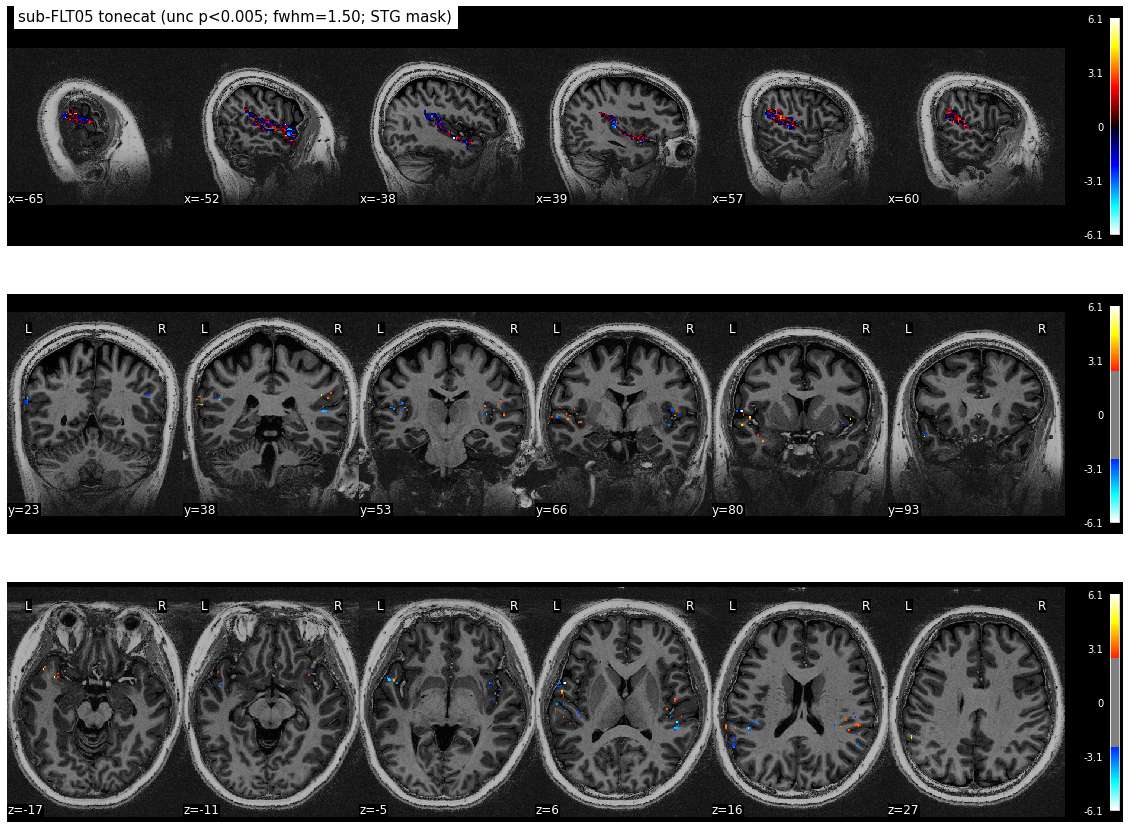

In [95]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
plotting.plot_stat_map(masked_img, bg_img=t1w_fpath, colorbar=True, #threshold=thresh_unc,
                      title='sub-%s %s (unc p<%.03f; fwhm=%.02f; STG mask)'%(model.subject_label, 
                                                                   task_label,p_val,fwhm_sub),
                      axes=axes[0],
                      display_mode='x', cut_coords=6)
plotting.plot_stat_map(masked_img, bg_img=t1w_fpath, colorbar=True, threshold=thresh_unc,
                       axes=axes[1],
                       display_mode='y', cut_coords=6)
plotting.plot_stat_map(masked_img, bg_img=t1w_fpath, colorbar=True, threshold=thresh_unc,
                       axes=axes[2],
                       display_mode='z', cut_coords=6)
plotting.show()

# save plot
plot_fpath = os.path.join(nilearn_dir, 
                          'sub-%s_task-%s_fwhm-%.02f_pval-%.03f_space-%s_mask-aud.png'%(model.subject_label,
                                                                    task_label,fwhm_sub, p_val,
                                                                    space_label))
#fig.savefig(plot_fpath)